In [1]:
from matplotlib import pyplot as plt

import pandas as pd
import numpy as np

from scipy.stats import pearsonr

import glob

In [2]:
### Graphics parameters
# ---------------------
size=19
params = {'legend.fontsize': 12,
          'axes.labelsize': 17,
          'axes.titlesize': size,
          'xtick.labelsize': size*0.75,
          'ytick.labelsize': size*0.75,
          'figure.figsize': (17*0.65,6.5*0.75),
            'axes.titlepad': 10}
plt.rcParams.update(params)

In [3]:
### Dictionary with information about samples, conditions and uptake reactions
# ----------------------------------------------------------------------------
uptrxn = {
    "Scerevisiae": {
        "Glucose": "EX_glc__D_e",
        "Glucose - Chemostat": "EX_glc__D_e"
    },
    "Sstipitis": {
        "Glucose": "SS1232",
        "Glucose - Chemostat": "SS1232"
    },
    "Ylipolytica": {
        "Glycerol + Glucose": "y001808" #,y001714"
    },
    "Bsubtilis": {
        "Glucose": "EX_glc__D_e",
        "Fructose": "EX_fru_e",
        "Gluconate": "EX_glcn__D_e",
        "Succinate + Glutamate": "EX_succ_e", # ,EX_glu__L_e",
        "Glycerol": "EX_glyc_e",
        "Malate": "EX_mal__L_e",
        "Malate + Glucose": "EX_mal__L_e", # ,EX_glc__D_e",
        "Pyruvate": "EX_pyr_e",
    },
    "Ecoli": {
        "Acetate": "EX_ac_e",
        "Fructose": "EX_fru_e",
        "Galactose": "EX_gal_e",
        "Gluconate": "EX_glcn_e",
        "Glucose": "EX_glc__D_e",
        "Glycerol": "EX_glyc_e",
        "Pyruvate": "EX_pyr_e",
        "Succinate": "EX_succ_e",
    }
}

## AC: *E. coli*

In [4]:
### Calculate Pheflux's correlations
# ----------------------------------
dfpheflux = pd.DataFrame()

sources, conditions, pearsons = [],[],[]
for mo in ["Ecoli"]:
    # load fluxes
    if mo != "Bsubtilis":
        excel = pd.read_excel("MeasuredFluxes.xlsx", sheet_name=mo, index_col=(1)).dropna()
    else:
        excel = pd.read_excel("MeasuredFluxes.xlsx", sheet_name=mo, index_col=(2)).dropna()
    csv = pd.read_csv("pheflux_fluxes/"+mo+"_AC.csv", sep="\t", lineterminator="\n").set_index("Reaction")
    
    # scale pheflux fluxes
    for sample in excel.columns:
        if "Reaction"==sample or "Enzyme BSU numbers"==sample or "Flux Name"==sample:continue
        condition = sample.split("\n")[-1]
        uptakerxn = uptrxn[mo][condition]
        
        predCSource = csv[condition].loc["R_"+uptakerxn]
        expCSource = excel[sample][uptakerxn]
                
        # save fluxes in vectors: expfluxes, phefluxes
        expfluxes = []
        phefluxes = []
        for reaction in excel.index:
            if "Growth rate [1/h]" == reaction:continue
            expflux = excel[sample].loc[reaction]
            pheflux = csv[condition].loc["R_"+reaction]
            expfluxes.append(expflux)
            phefluxes.append(pheflux)
        
        # Pearson correlation 
        corr, pvalue = pearsonr(phefluxes, expfluxes)        
        
        # save data for df
        sources.append(mo)
        conditions.append(condition)
        pearsons.append(corr)
        
# create a df
dfpheflux["Data_source"] = sources
dfpheflux["Condition"] = conditions
dfpheflux["Corr"] = pearsons
dfpheflux

,Data_source,Condition,Corr
0,Ecoli,Acetate,0.136162
1,Ecoli,Fructose,0.857486
2,Ecoli,Galactose,0.825753
3,Ecoli,Glucose,0.918468
4,Ecoli,Glycerol,0.796910
5,Ecoli,Gluconate,0.732376
6,Ecoli,Pyruvate,0.303565
7,Ecoli,Succinate,0.351624


In [5]:
### Calculate spot's correlations
# ----------------------------------
dfspot = pd.DataFrame()

sources, conditions, pearsons = [],[],[]
for mo in  ["Ecoli"]:
    # load fluxes
    if mo != "Bsubtilis":
        excel = pd.read_excel("MeasuredFluxes.xlsx", sheet_name=mo, index_col=(1)).dropna()
    else:
        excel = pd.read_excel("MeasuredFluxes.xlsx", sheet_name=mo, index_col=(2)).dropna()
    csv = pd.read_csv("spot_fluxes/"+mo+"_AC.csv", sep="\t", lineterminator="\n").set_index("Reaction")
    
    # scale spot fluxes
    for sample in excel.columns:
        if "Reaction"==sample or "Enzyme BSU numbers"==sample or "Flux Name"==sample:continue
        condition = sample.split("\n")[-1]
        uptakerxn = uptrxn[mo][condition]
        
        predCSource = csv[condition].loc["R_"+uptakerxn]
        expCSource = excel[sample][uptakerxn]
                
        # save fluxes in vectors: expfluxes, spotfluxes
        expfluxes = []
        spotfluxes = []
        for reaction in excel.index:
            if "Growth rate [1/h]" == reaction:continue
            expflux = excel[sample].loc[reaction]
            spot = csv[condition].loc["R_"+reaction]
            expfluxes.append(expflux)
            spotfluxes.append(spot)
        
        # Pearson correlation 
        corr, pvalue = pearsonr(spotfluxes, expfluxes)        
        
        # save data for df
        sources.append(mo)
        conditions.append(condition)
        pearsons.append(corr)
        
# create a df
dfspot["Data_source"] = sources
dfspot["Condition"] = conditions
dfspot["Corr"] = pearsons
dfspot

,Data_source,Condition,Corr
0,Ecoli,Acetate,-0.150910
1,Ecoli,Fructose,0.077267
2,Ecoli,Galactose,-0.151462
3,Ecoli,Glucose,0.111112
4,Ecoli,Glycerol,0.055947
5,Ecoli,Gluconate,0.174079
6,Ecoli,Pyruvate,-0.069634
7,Ecoli,Succinate,-0.123149


In [6]:
### Calculate fbal2's correlations
# ----------------------------------
dffbal2 = pd.DataFrame()

sources, conditions, pearsons = [],[],[]
for mo in  ["Ecoli"]:
    # load fluxes
    if mo != "Bsubtilis":
        excel = pd.read_excel("MeasuredFluxes.xlsx", sheet_name=mo, index_col=(1)).dropna()
    else:
        excel = pd.read_excel("MeasuredFluxes.xlsx", sheet_name=mo, index_col=(2)).dropna()
    csv = pd.read_csv("fbal2_fluxes/"+mo+"_AC.csv", sep="\t", lineterminator="\n").set_index("Reaction")
    
    # scale fbal2 fluxes
    for sample in excel.columns:
        if "Reaction"==sample or "Enzyme BSU numbers"==sample or "Flux Name"==sample:continue
        condition = sample.split("\n")[-1]
        uptakerxn = uptrxn[mo][condition]

        if mo == "Ylipolytica" and condition == "Glycerol + Glucose":
            uptakerxn = "y001714"
            
        predCSource = csv[condition].loc["R_"+uptakerxn]
        expCSource = excel[sample][uptakerxn]
                
        # save fluxes in vectors: expfluxes, fbale2fluxes
        expfluxes = []
        fbale2fluxes = []
        for reaction in excel.index:
            if "Growth rate [1/h]" == reaction:continue
            expflux = excel[sample].loc[reaction]
            fbal2 = csv[condition].loc["R_"+reaction]
            expfluxes.append(expflux)
            fbale2fluxes.append(fbal2)
        
        # Pearson correlation 
        corr, pvalue = pearsonr(fbale2fluxes, expfluxes)        
        
        # save data for df
        sources.append(mo)
        conditions.append(condition)
        pearsons.append(corr)
        
# create a df
dffbal2["Data_source"] = sources
dffbal2["Condition"] = conditions
dffbal2["Corr"] = pearsons
dffbal2

,Data_source,Condition,Corr
0,Ecoli,Acetate,-0.179159
1,Ecoli,Fructose,0.832519
2,Ecoli,Galactose,0.770280
3,Ecoli,Glucose,0.871441
4,Ecoli,Glycerol,0.758077
5,Ecoli,Gluconate,0.712230
6,Ecoli,Pyruvate,0.432885
7,Ecoli,Succinate,0.166342


In [7]:
### Pearson's correlation coefficient 
# -----------------------------------
pheflux_corr = dfpheflux["Corr"]
spot_corr = dfspot["Corr"]
fbal2_corr = dffbal2["Corr"]

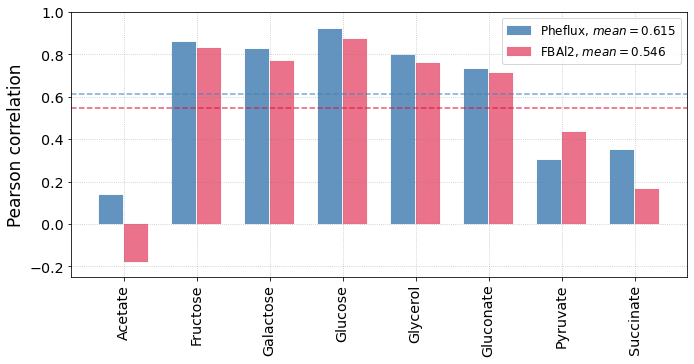

In [8]:
### Figure S1.A:
# -----------
labels = dfpheflux['Condition']
x = pheflux_corr
z = fbal2_corr

n = np.arange(len(labels))*1.5
width = 0.5  # the width of the bars


# barplots
plt.grid(color='grey',linestyle='dotted', alpha=0.5)
phefluxlabel = 'Pheflux, $mean ='+str(round(x.mean(), 3))+'$'
plt.bar( n - width/1.93, x, width, label=phefluxlabel
       , color='steelblue', alpha=0.85, edgecolor='steelblue', linewidth=0.1)

fbal2label = 'FBAl2, $mean ='+str(round(z.mean(), 3))+'$'
plt.bar( n + width/1.93, z, width, label=fbal2label
       , color='crimson', alpha=0.6, edgecolor='crimson', linewidth=0.1)

# horizontal lines
plt.axhline(x.mean(), c='steelblue', linestyle='--', alpha=0.7)
plt.axhline(z.mean(), c='crimson', linestyle='--', alpha=0.7)

# others
plt.title('')
plt.ylabel("Pearson correlation")
plt.legend()

plt.ylim(-0.25, 1)
# plt.xlim(-1, 31)
plt.xticks(ticks=n, labels=labels)
plt.xticks(rotation=90)
# plt.savefig('fig2_AC.svg', bbox_inches="tight") #save fig
plt.show()

## Full AC: *E. coli*

In [9]:
### Calculate Pheflux's correlations
# ----------------------------------
dfpheflux = pd.DataFrame()

sources, conditions, pearsons = [],[],[]
for mo in ["Ecoli"]:
    # load fluxes
    if mo != "Bsubtilis":
        excel = pd.read_excel("MeasuredFluxes.xlsx", sheet_name=mo, index_col=(1)).dropna()
    else:
        excel = pd.read_excel("MeasuredFluxes.xlsx", sheet_name=mo, index_col=(2)).dropna()
    csv = pd.read_csv("pheflux_fluxes/"+mo+"_fullAC.csv", sep="\t", lineterminator="\n").set_index("Reaction")
    
    # scale pheflux fluxes
    for sample in excel.columns:
        if "Reaction"==sample or "Enzyme BSU numbers"==sample or "Flux Name"==sample:continue
        condition = sample.split("\n")[-1]
        uptakerxn = uptrxn[mo][condition]
        
        predCSource = csv[condition].loc["R_"+uptakerxn]
        expCSource = excel[sample][uptakerxn]
                
        # save fluxes in vectors: expfluxes, phefluxes
        expfluxes = []
        phefluxes = []
        for reaction in excel.index:
            if "Growth rate [1/h]" == reaction:continue
            expflux = excel[sample].loc[reaction]
            pheflux = csv[condition].loc["R_"+reaction]
            expfluxes.append(expflux)
            phefluxes.append(pheflux)
        
        # Pearson correlation 
        corr, pvalue = pearsonr(phefluxes, expfluxes)        
        
        # save data for df
        sources.append(mo)
        conditions.append(condition)
        pearsons.append(corr)
        
# create a df
dfpheflux["Data_source"] = sources
dfpheflux["Condition"] = conditions
dfpheflux["Corr"] = pearsons
dfpheflux

,Data_source,Condition,Corr
0,Ecoli,Acetate,-0.057997
1,Ecoli,Fructose,0.859389
2,Ecoli,Galactose,0.814302
3,Ecoli,Glucose,0.888670
4,Ecoli,Glycerol,0.855924
5,Ecoli,Gluconate,0.775766
6,Ecoli,Pyruvate,0.069675
7,Ecoli,Succinate,0.055343


In [10]:
### Calculate spot's correlations
# ----------------------------------
dfspot = pd.DataFrame()

sources, conditions, pearsons = [],[],[]
for mo in  ["Ecoli"]:
    # load fluxes
    if mo != "Bsubtilis":
        excel = pd.read_excel("MeasuredFluxes.xlsx", sheet_name=mo, index_col=(1)).dropna()
    else:
        excel = pd.read_excel("MeasuredFluxes.xlsx", sheet_name=mo, index_col=(2)).dropna()
    csv = pd.read_csv("spot_fluxes/"+mo+"_fullAC.csv", sep="\t", lineterminator="\n").set_index("Reaction")
    
    # scale spot fluxes
    for sample in excel.columns:
        if "Reaction"==sample or "Enzyme BSU numbers"==sample or "Flux Name"==sample:continue
        condition = sample.split("\n")[-1]
        uptakerxn = uptrxn[mo][condition]
        
        predCSource = csv[condition].loc["R_"+uptakerxn]
        expCSource = excel[sample][uptakerxn]
                
        # save fluxes in vectors: expfluxes, spotfluxes
        expfluxes = []
        spotfluxes = []
        for reaction in excel.index:
            if "Growth rate [1/h]" == reaction:continue
            expflux = excel[sample].loc[reaction]
            spot = csv[condition].loc["R_"+reaction]
            expfluxes.append(expflux)
            spotfluxes.append(spot)
        
        # Pearson correlation 
        corr, pvalue = pearsonr(spotfluxes, expfluxes)        
        
        # save data for df
        sources.append(mo)
        conditions.append(condition)
        pearsons.append(corr)
        
# create a df
dfspot["Data_source"] = sources
dfspot["Condition"] = conditions
dfspot["Corr"] = pearsons
dfspot

,Data_source,Condition,Corr
0,Ecoli,Acetate,-0.085616
1,Ecoli,Fructose,-0.063243
2,Ecoli,Galactose,-0.144379
3,Ecoli,Glucose,-0.163288
4,Ecoli,Glycerol,-0.051235
5,Ecoli,Gluconate,-0.053352
6,Ecoli,Pyruvate,-0.151757
7,Ecoli,Succinate,-0.005759


In [11]:
### Calculate fbal2's correlations
# ----------------------------------
dffbal2 = pd.DataFrame()

sources, conditions, pearsons = [],[],[]
for mo in  ["Ecoli"]:
    # load fluxes
    if mo != "Bsubtilis":
        excel = pd.read_excel("MeasuredFluxes.xlsx", sheet_name=mo, index_col=(1)).dropna()
    else:
        excel = pd.read_excel("MeasuredFluxes.xlsx", sheet_name=mo, index_col=(2)).dropna()
    csv = pd.read_csv("fbal2_fluxes/"+mo+"_fullAC.csv", sep="\t", lineterminator="\n").set_index("Reaction")
    
    # scale fbal2 fluxes
    for sample in excel.columns:
        if "Reaction"==sample or "Enzyme BSU numbers"==sample or "Flux Name"==sample:continue
        condition = sample.split("\n")[-1]
        uptakerxn = uptrxn[mo][condition]

        if mo == "Ylipolytica" and condition == "Glycerol + Glucose":
            uptakerxn = "y001714"
            
        predCSource = csv[condition].loc["R_"+uptakerxn]
        expCSource = excel[sample][uptakerxn]
                
        # save fluxes in vectors: expfluxes, fbale2fluxes
        expfluxes = []
        fbale2fluxes = []
        for reaction in excel.index:
            if "Growth rate [1/h]" == reaction:continue
            expflux = excel[sample].loc[reaction]
            fbal2 = csv[condition].loc["R_"+reaction]
            expfluxes.append(expflux)
            fbale2fluxes.append(fbal2)
        
        # Pearson correlation 
        corr, pvalue = pearsonr(fbale2fluxes, expfluxes)        
        
        # save data for df
        sources.append(mo)
        conditions.append(condition)
        pearsons.append(corr)
        
# create a df
dffbal2["Data_source"] = sources
dffbal2["Condition"] = conditions
dffbal2["Corr"] = pearsons
dffbal2

,Data_source,Condition,Corr
0,Ecoli,Acetate,-0.245223
1,Ecoli,Fructose,0.769976
2,Ecoli,Galactose,0.713341
3,Ecoli,Glucose,0.807909
4,Ecoli,Glycerol,0.755054
5,Ecoli,Gluconate,0.651809
6,Ecoli,Pyruvate,0.022265
7,Ecoli,Succinate,-0.138035


In [12]:
### Pearson's correlation coefficient 
# -----------------------------------
pheflux_corr = dfpheflux["Corr"]
spot_corr = dfspot["Corr"]
fbal2_corr = dffbal2["Corr"]

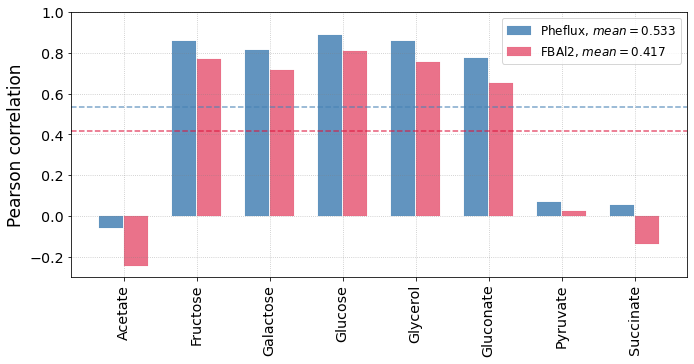

In [13]:
### Figure S1.B:
# -----------
labels = dfpheflux['Condition']
x = pheflux_corr
z = fbal2_corr

n = np.arange(len(labels))*1.5
width = 0.5  # the width of the bars


# barplots
plt.grid(color='grey',linestyle='dotted', alpha=0.5)
phefluxlabel = 'Pheflux, $mean ='+str(round(x.mean(), 3))+'$'
plt.bar( n - width/1.93, x, width, label=phefluxlabel
       , color='steelblue', alpha=0.85, edgecolor='steelblue', linewidth=0.1)

fbal2label = 'FBAl2, $mean ='+str(round(z.mean(), 3))+'$'
plt.bar( n + width/1.93, z, width, label=fbal2label
       , color='crimson', alpha=0.6, edgecolor='crimson', linewidth=0.1)

# horizontal lines
plt.axhline(x.mean(), c='steelblue', linestyle='--', alpha=0.7)
plt.axhline(z.mean(), c='crimson', linestyle='--', alpha=0.7)

# others
plt.title('')
plt.ylabel("Pearson correlation")
plt.legend()

plt.ylim(-0.3, 1)
# plt.xlim(-1, 31)
plt.xticks(ticks=n, labels=labels)
plt.xticks(rotation=90)
# plt.savefig('fig2_fullAC.svg', bbox_inches="tight") #save fig
plt.show()